In [1]:
"""
Created on Tuesday 22 March 2022
Author: WSH
"""
#import libraries
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

In [2]:
#import CSV data
with open("1_deg_per_sec_sti.csv", "r") as i:
    rawdata = list(csv.reader(i,delimiter = ","))
    
data = np.array(rawdata[1:],dtype=np.float)
time = data[:,0]
position = data[:,1]

/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_74138/2616252067.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = np.array(rawdata[1:],dtype=np.float)


/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_74138/2399720788.py:9: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.xscale("Linear")
/var/folders/hj/4_1_bgn11_dgm99bq0lnjxl80000gn/T/ipykernel_74138/2399720788.py:10: MatplotlibDeprecationWarning: Support for case-insensitive scales is deprecated since 3.5 and support will be removed two minor releases later.
  plt.yscale("Linear")


'\nColours: blue = #1f77b4, orange = #ff7f0e, green = #2ca02c, red = #d62728\npurple = #9467bd, brown = #8c564b, pink = #e377c2, grey = #7f7f7f, \nyellow-green = #bcbd22, light blue = #17becf\n'

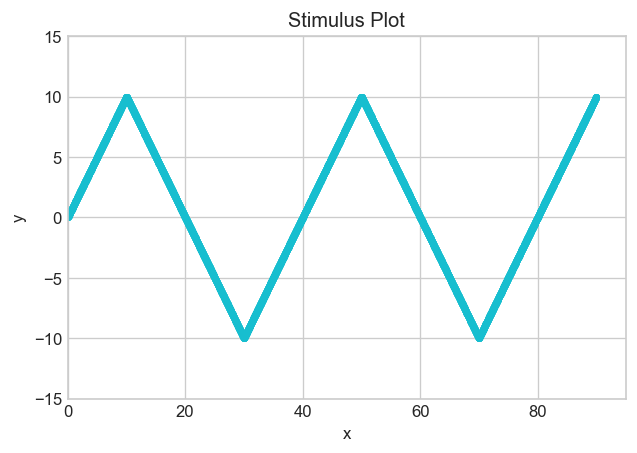

In [3]:
#plot the Eye Tracker data
plt.style.use('seaborn-whitegrid')
plt.figure(1,dpi=120)
plt.title("Stimulus Plot")
plt.xlabel(rawdata[0][0])
plt.ylabel(rawdata[0][1])
plt.xlim(0,95)
plt.ylim(-15,15)
plt.xscale("Linear")
plt.yscale("Linear")
plt.scatter(time, position, label = "Stimulus Data", marker = 'o', s=10, c='#17becf')

"""
Colours: blue = #1f77b4, orange = #ff7f0e, green = #2ca02c, red = #d62728
purple = #9467bd, brown = #8c564b, pink = #e377c2, grey = #7f7f7f, 
yellow-green = #bcbd22, light blue = #17becf
"""

In [4]:
#define function
def func(x, a, b, c):  #Position as a function of time.
    return a*(2/np.pi)*np.arcsin(np.sin(np.pi*(b*x+c)))

In [5]:
#initial guesses
#for 1 degree per second: [10, 0.05, 0]
#for 2 degrees per second: [10, 0.1, 0]
#for 4 degrees per second: [10, 0.2, 0]
#for 6 degrees per second: [10, 0.3, 0]
#for 8 degrees per second: [10, 0.4, 0]
InitialGuess = [10, 0.05, 0]

In [6]:
#curve fit data to model
ET_popt, ET_pcov = curve_fit(func, time, position, p0=InitialGuess)
ET_perr = np.sqrt(np.diag(ET_pcov))

Y_pred = func(time, *ET_popt)

R_sq_ET = r2_score(Y_pred, position)

print(ET_popt) #print optimized parameters
#print(ET_pcov)   #print covariance matrix
print(ET_perr) #print parameter errors
print("ET fit R^2: ", R_sq_ET) #print fit R^2 values

[ 9.98990344e+00  5.00004541e-02 -2.84421053e-05]
[1.66492191e-04 1.82381050e-07 9.40523339e-06]
ET fit R^2:  0.9999985047746294


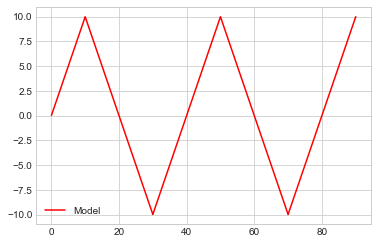

In [77]:
#evaluate and plot function
plt.plot(time, func(time, *ET_popt), 'r', label="Model")
plt.legend()